In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.spatial.distance import pdist, squareform #scipy spatial distance
import sklearn as sk
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU
from keras import metrics
from keras import backend as K
import time
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])
print(X)

[[ 0.00000000e+00  1.25786178e-02  2.51552454e-02  3.77278927e-02
   5.02945704e-02  6.28532900e-02  7.54020646e-02  8.79389084e-02
   1.00461838e-01  1.12968871e-01  1.25458030e-01  1.37927338e-01
   1.50374822e-01  1.62798512e-01  1.75196443e-01  1.87566653e-01
   1.99907185e-01  2.12216086e-01  2.24491409e-01  2.36731210e-01
   2.48933554e-01  2.61096510e-01  2.73218154e-01  2.85296566e-01
   2.97329837e-01  3.09316061e-01  3.21253344e-01  3.33139795e-01
   3.44973534e-01  3.56752688e-01  3.68475395e-01  3.80139798e-01
   3.91744053e-01  4.03286322e-01  4.14764781e-01  4.26177612e-01
   4.37523010e-01  4.48799180e-01  4.60004337e-01  4.71136709e-01
   4.82194534e-01  4.93176062e-01  5.04079556e-01  5.14903290e-01
   5.25645553e-01  5.36304643e-01  5.46878875e-01  5.57366576e-01
   5.67766086e-01  5.78075760e-01  5.88293965e-01  5.98419086e-01
   6.08449521e-01  6.18383682e-01  6.28219997e-01  6.37956911e-01
   6.47592882e-01  6.57126385e-01  6.66555913e-01  6.75879973e-01
   6.85097

In [7]:
import yfinance as yf

tsla_df = yf.download('TSLA',
                      start='2023-01-01',
                      end='2023-07-30',
                      progress=False)

df = tsla_df[['Adj Close']]
df_array=df.to_numpy()
print(df_array)

[[108.09999847]
 [113.63999939]
 [110.33999634]
 [113.05999756]
 [119.76999664]
 [118.84999847]
 [123.22000122]
 [123.55999756]
 [122.40000153]
 [131.49000549]
 [128.77999878]
 [127.16999817]
 [133.41999817]
 [143.75      ]
 [143.88999939]
 [144.42999268]
 [160.27000427]
 [177.8999939 ]
 [166.66000366]
 [173.22000122]
 [181.41000366]
 [188.27000427]
 [189.97999573]
 [194.75999451]
 [196.80999756]
 [201.28999329]
 [207.32000732]
 [196.88999939]
 [194.63999939]
 [209.25      ]
 [214.24000549]
 [202.03999329]
 [208.30999756]
 [197.36999512]
 [200.86000061]
 [202.07000732]
 [196.88000488]
 [207.63000488]
 [205.71000671]
 [202.77000427]
 [190.8999939 ]
 [197.78999329]
 [193.80999756]
 [187.71000671]
 [182.        ]
 [172.91999817]
 [173.44000244]
 [174.47999573]
 [183.25999451]
 [180.44999695]
 [184.13000488]
 [180.13000488]
 [183.25      ]
 [197.58000183]
 [191.1499939 ]
 [192.22000122]
 [190.41000366]
 [191.80999756]
 [189.19000244]
 [193.88000488]
 [195.27999878]
 [207.46000671]
 [194.77

In [4]:
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

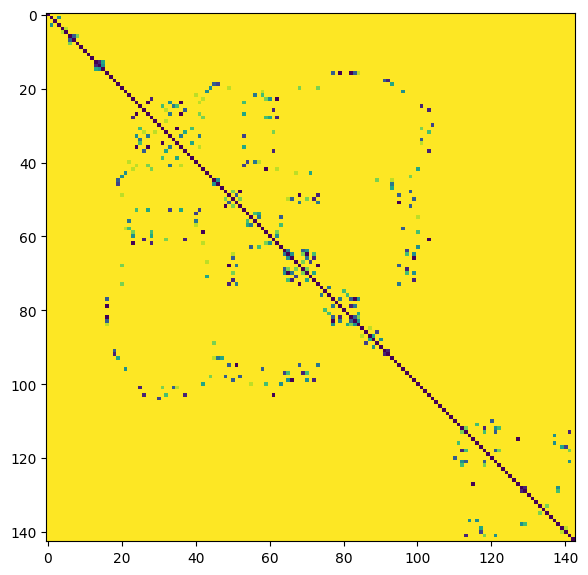

In [17]:
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(recurrence_plot(df_array))